<a href="https://colab.research.google.com/github/camsanjose/2020-02-19-Rpresentation/blob/master/Thesis_code_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install vaderSentiment

     |████████████████████████████████| 133kB 12.8MB/s 
     |████████████████████████████████| 245kB 11.1MB/s 
     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 604kB 20.2MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 3.1MB 30.7MB/s 
     |████████████████████████████████| 296kB 48.3MB/s 
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=d0c518301b6bce5d2d0c94594e6812c278376e244a4577ff8ab7f5d6241cfa7b
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=9e1e509bf4cf3a87f9ee7ae818782053e8a698f4cb556842620072c47bb6bb9d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: go

In [ ]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
import nltk 
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [ ]:
df=pd.read_csv('./drive/My Drive/TFM/dforder.csv', encoding = 'latin1')

In [ ]:
print(df)

                                                     tweet                   id
0        event great place set sustainability trend par...                   12
1            hahaha patigue plus climate change ganun lang                   12
2        recommend people use paper reuse times polyest...                   12
3                                        wow strong speech                   13
4                                go tag lovely finite look                   17
...                                                    ...                  ...
5509133                          shit honestly scary think  1130011369850281984
5509134  way go productive conversation prepare natural...  1130075956989878272
5509135               good luck ireland good time bad time  1130109507915399169
5509136  social medium great platform increase awarenes...  1130120404369072128
5509137  walk tall thing try stop think climate change ...  1130140535455387653

[5509138 rows x 2 columns]


In [ ]:
# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['tokens'] = df['tweet'].apply(tokenize)
print(df['tokens'])

0          [event, great, place, set, sustainability, tre...
1          [hahaha, patigue, plus, climate, change, ganun...
2          [recommend, people, use, paper, reuse, times, ...
3                                      [wow, strong, speech]
4                            [go, tag, lovely, finite, look]
                                 ...                        
5509133                       [shit, honestly, scary, think]
5509134    [way, go, productive, conversation, prepare, n...
5509135         [good, luck, ireland, good, time, bad, time]
5509136    [social, medium, great, platform, increase, aw...
5509137    [walk, tall, thing, try, stop, think, climate,...
Name: tokens, Length: 5509138, dtype: object


In [ ]:
from random import seed
seed(24)
# Create a dictionary
id2word = Dictionary(df['tokens'])
print(len(id2word)) #449930

449929


In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))#100000

100000


In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['tokens']]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [ ]:
# number of topics
k=10
# LDA model 
base_model = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=k,
                                        passes=5,
                                        random_state= 24)
# Compute Coherence Score
coherence_model2 = CoherenceModel(model=base_model, texts=df['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence2 = coherence_model2.get_coherence()
print('\nCoherence Score: ', coherence2)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

KeyboardInterrupt: ignored


KeyboardInterrupt

Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/mode

In [ ]:
df=pd.read_csv('./drive/My Drive/TFM/tte.csv', encoding = 'latin1')

In [ ]:
# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    text = re.sub(r'http\S+', '', text)# https://www.youtube.com/watch?v=O2onA4r5UaY
    text = re.sub('@*#*', '', text) # Remove @ $ # 
   # text = remove_users(text)
   # text = remove_links(text)
    return text

# Apply tokenizer
SA = df['x'].apply(tokenize)
SA = pd.DataFrame(SA)

In [ ]:
print(SA)

                                                          x
0         An eye-opening article. This further reinforce...
1         Bangladesh Confronts Climate Change - book goe...
2         If thereâs a definition of insanity itâs A...
3         The scene in Jurassic Park when Newman loses h...
4         The scene in Jurassic Park when Newman loses h...
...                                                     ...
26778407  DYK climatechange is impacting snow leopards? ...
26778408  Once spoke to a woman you said she's hoping th...
26778409  Poor country scientists to get help to study g...
26778410  Take our climate pledge and do your part to re...
26778411  Earth to Trump: you are too late, science of c...

[26778412 rows x 1 columns]


In [ ]:
# function of tweet scores 
def tweet_scores(data_frame): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer()
    scores = []
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores


In [ ]:
twtscr= tweet_scores(SA)

In [ ]:
twtsa = pd.DataFrame(twtscr)

In [ ]:
twtsa.columns = ['comp']

In [ ]:
print(twtsa.head(10))

     comp
0  0.8430
1 -0.2263
2 -0.9136
3 -0.3182
4 -0.3182
5  0.1531
6  0.0000
7  0.7777
8 -0.7906
9 -0.7906


In [ ]:
twtsa.to_csv('twtsa.csv')

In [ ]:
twtsa.describe()

,comp
count,2.677841e+07
mean,-5.732172e-03
std,4.921727e-01
min,-9.988000e-01
25%,-3.826000e-01
50%,0.000000e+00
75%,3.818000e-01
max,9.997000e-01


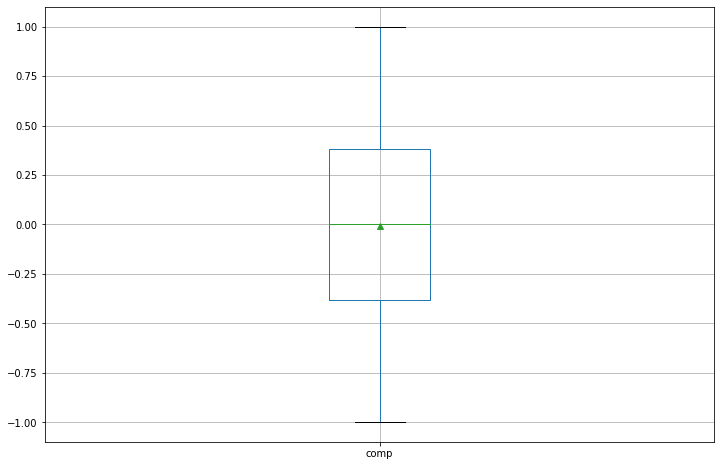

In [ ]:
import matplotlib.pyplot as plt
twtsa.boxplot(column='comp', figsize=(12,8), showmeans=True)


In [ ]:
results= []
for i in range(len(twtsa)):
  if twtsa.iloc[i,0] >= 0.05: 
    result = 'pos'
  elif twtsa.iloc[i,0] <= - 0.05:
    result= 'neg'
  else:
    result= 'neutral' 
  results.append(result)


In [ ]:
print(results)

['pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neutral', 'pos', 'neg', 'neg', 'pos', 'neutral', 'pos', 'neutral', 'pos', 'neutral', 'neg', 'pos', 'neg', 'neg', 'neutral', 'pos', 'pos', 'neg', 'pos', 'pos', 'neutral', 'neutral', 'pos', 'pos', 'neutral', 'pos', 'neg', 'neg', 'neg', 'neutral', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neutral', 'neg', 'neg', 'neutral', 'neutral', 'neg', 'neutral', 'neg', 'neg', 'neutral', 'pos', 'neg', 'neg', 'neutral', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neutral', 'neg', 'neg', 'neg', 'neg', 'neg', 'neutral', 'neg', 'neg', 'neg', 'neutral', 'neg', 'pos', 'neutral', 'neg', 'neg', 'neg', 'neg', 'neutral', 'neutral', 'neutral', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neutral', 'pos', 'neutral', 'neutral', 'neg', 'neg', 'neg']


In [ ]:
results2 = pd.DataFrame(results)

In [ ]:
results2.to_csv('results2.csv')

In [ ]:
from google.colab import files
files.download('results2.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=pd.read_csv('./drive/My Drive/TFM/results.csv', encoding = 'latin1')

In [ ]:
#df.columns = ['num','comp']
df= df['comp']
print(df.head(10))

0    1
1   -1
2   -1
3   -1
4   -1
5    1
6    0
7    1
8   -1
9   -1
Name: comp, dtype: int64


In [ ]:
(df == 0).sum() # 5228965
(df == 1).sum() #10886190
(df == -1).sum() #10663257

10886190

In [ ]:
twtsa=pd.read_csv('./drive/My Drive/TFM/twtsa.csv', encoding = 'latin1')

In [ ]:
print(twtsa.head(10))

   Unnamed: 0    comp
0           0  0.8430
1           1 -0.2263
2           2 -0.9136
3           3 -0.3182
4           4 -0.3182
5           5  0.1531
6           6  0.0000
7           7  0.7777
8           8 -0.7906
9           9 -0.7906


In [ ]:
results= []
for i in range(len(twtsa)):
  if twtsa.iloc[i,1] >= 0.07: 
    result = 1
  elif twtsa.iloc[i,1] <= - 0.07:
    result= -1
  else:
    result= 0 
  results.append(result)

In [ ]:
results = pd.DataFrame(results)
print(results.head(10))

   0
0  1
1 -1
2 -1
3 -1
4 -1
5  1
6  0
7  1
8 -1
9 -1


In [ ]:
results.columns = ['comp']
df= results['comp']
print(df.head(10))

0    1
1   -1
2   -1
3   -1
4   -1
5    1
6    0
7    1
8   -1
9   -1
Name: comp, dtype: int64


In [ ]:
(df == 0).sum() # 5207732 5487742 5174233 5521133
#(df == 1).sum() #10895484 10775929 10911471
#(df == -1).sum() #10675196 10514741 10692708 10497322

5521133

In [ ]:
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
list(np.arange(0.01, 1, 0.3))

[0.01, 0.31, 0.61, 0.9099999999999999]